# Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update({'font.size': 14})
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

## Dataset locations

In [2]:
new_dataset = 'cleaned/'
old_dataset = '../dataset_raw/CovidDecember12-2021/'

## Utils

In [55]:
def valid_date(date):
    try:
        pd.to_datetime(date)
        return True
    except:
        return False

def plot_comparison(merged:pd.DataFrame, title:str, selected_fips:list[int]=[1001], fontsize=14):
    for fips in selected_fips:
        plt.figure()
        merged_selected = merged[merged['FIPS']==fips].drop(columns='FIPS')
        merged_selected = merged_selected.set_index('Date')
        merged_selected.plot(figsize=(18,8))

        # adding label to x-axis
        plt.xlabel('Date')

        plt.title(f'{title} | County {fips}')
        
        # adding legend.
        plt.legend()

# Description
## Used
### Source found
* Air Pollution.csv
* Testing.csv
* US_daily_cumulative_cases_Dec12.csv
* Vaccination.csv
* VaccinationOneDose.csv
  
### Source not found
* Age Distribution.csv
* Comorbidities.csv
* Disease Spread.csv
* Social Distancing.csv
* Health Disparities.csv
* Mobility.csv
* Residential Density.csv
* Transmissible Cases.csv

  
## Not used
* 2020votes.csv
* Alaskavoting2016.csv
* Demographics.csv
* Hospital Beds.csv
* [US_daily_cumulative_deaths_Dec12.csv](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map)

## Supporting files
### Source found
* [RuralityCodes.csv](https://www.ers.usda.gov/data-products/rural-urban-commuting-area-codes.aspx)
* Rurality_Median_Mad.csv - Calculated from `RuralityCodes.csv`.
* [Population.csv](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/)

# Comparison for sources found

## Air polution

### Old dataset

In [5]:
old = pd.read_csv(old_dataset+'Air Pollution.csv')
old.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,...,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958
1,"Alabama, Baldwin",1003,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,...,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126
2,"Alabama, Barbour",1005,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,...,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982
3,"Alabama, Bibb",1007,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,...,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018
4,"Alabama, Blount",1009,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,...,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958


In [6]:
old.rename(columns={'2020-02-28':'Air pollution'}, inplace=True)
old = old[['FIPS', 'Air pollution']]

### New dataset
Collected from [county health ranking](https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation)

In [7]:
new = pd.read_csv(new_dataset+'Health rank measure.csv')
new = new[['FIPS', 'Average Daily PM2.5']]

### Merge and compare

In [9]:
merged = old.merge(new, on=['FIPS'], how='inner').reset_index(drop=True)
merged = merged.set_index('FIPS')
merged.iloc[:5, :].plot()

## Testing
The old dataset is a wrong one. It is state lavel test data copied to county level after some transformation. 
So there is no need to compare.

### Old

In [23]:
old = pd.read_csv(old_dataset+'Testing.csv')
old.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
1,"Alabama, Baldwin",1003,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
2,"Alabama, Barbour",1005,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
3,"Alabama, Bibb",1007,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
4,"Alabama, Blount",1009,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971


### New

In [25]:
new = pd.read_csv(new_dataset+'Testing.csv')
new.head()

,FIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.3,60.9,73.9,72.3,70.6,80.1,71.0,71.1,69.4,64.1
1,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178.9,174.6,168.1,168.9,163.4,155.1,152.6,149.9,153.3,161.1
2,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.9,16.0,17.0,17.4,17.0,14.6,14.0,14.7,14.7,14.3
3,1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.7,23.3,24.3,25.3,24.1,22.0,20.1,18.0,17.7,16.6
4,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.9,43.7,43.3,39.9,36.9,33.6,30.6,29.3,32.0,32.0


## Cases

### Old

In [28]:
old_cumulative_cases = pd.read_csv(old_dataset + 'US_daily_cumulative_cases_Dec12.csv')
old_cumulative_cases.head()

,Unnamed: 0,FIPS,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29
0,0,1001,0,0,0,0,0,0,0,0,...,10457,10457,10457,10477,10495,10508,10512,10512,10512,10512
1,1,1003,0,0,0,0,0,0,0,0,...,37959,37959,37959,38000,38014,38042,38061,38061,38061,38061
2,2,1005,0,0,0,0,0,0,0,0,...,3660,3660,3660,3688,3690,3691,3691,3691,3691,3691
3,3,1007,0,0,0,0,0,0,0,0,...,4333,4333,4333,4337,4338,4339,4340,4340,4340,4340
4,4,1009,0,0,0,0,0,0,0,0,...,10621,10621,10621,10640,10659,10696,10700,10700,10700,10700


#### Convert to daily

In [29]:
old_cumulative_cases.drop(
    columns=[col for col in old_cumulative_cases.columns if 'Unnamed:' in col], 
    inplace=True
)
df = old_cumulative_cases.copy()

# convert cumulative cases to daily 
df = df.T
head = df.iloc[0]
df = df.iloc[1:]
df.columns = head
df = df.diff()
df = df.T.reset_index()

old_daily_cases = df.fillna(method='ffill').fillna(0)

# melt date columns
old_daily_cases = old_daily_cases.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Cases'
).reset_index(drop=True)

# set negative daily cases to 0
old_daily_cases.loc[old_daily_cases['Cases']<0, 'Cases'] = 0

### New data
Cleaned daily covid cases from [USAFacts](https://usafacts.org/).

In [30]:
usaFacts = pd.read_csv(new_dataset + 'Cases.csv')
usaFacts.head()

,FIPS,Date,Cases
0,1001,2020-01-22,0
1,1003,2020-01-22,0
2,1005,2020-01-22,0
3,1007,2020-01-22,0
4,1009,2020-01-22,0


### Merge and compare with old data

In [31]:
merged = old_daily_cases.merge(usaFacts, on=['FIPS', 'Date'], how='inner', suffixes=('_old', '_new'))
merged[merged['Cases_old'] != merged['Cases_new']]

,FIPS,Date,Cases_old,Cases_new
186,6001,2020-02-29,0.0,1
192,6013,2020-02-29,0.0,6
204,6037,2020-02-29,0.0,14
206,6041,2020-02-29,0.0,1
215,6059,2020-02-29,0.0,6
...,...,...,...,...
2010851,55131,2021-11-29,0.0,55
2010852,55133,2021-11-29,0.0,2
2010854,55137,2021-11-29,0.0,1
2010855,55139,2021-11-29,0.0,134


In [34]:
print('Statistics of mismatch')
merged[merged['Cases_old'] != merged['Cases_new']].describe()

Statistics of mismatch


,FIPS,Cases_old,Cases_new
count,1.361621e+06,1.361621e+06,1.361621e+06
mean,3.005600e+04,3.426291e+01,3.445553e+01
std,1.530387e+04,1.770048e+02,1.772044e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.808700e+04,1.000000e+00,1.000000e+00
50%,2.906300e+04,5.000000e+00,6.000000e+00
75%,4.502700e+04,2.100000e+01,2.100000e+01
max,5.604500e+04,2.985200e+04,2.985200e+04


<Figure size 432x288 with 0 Axes>

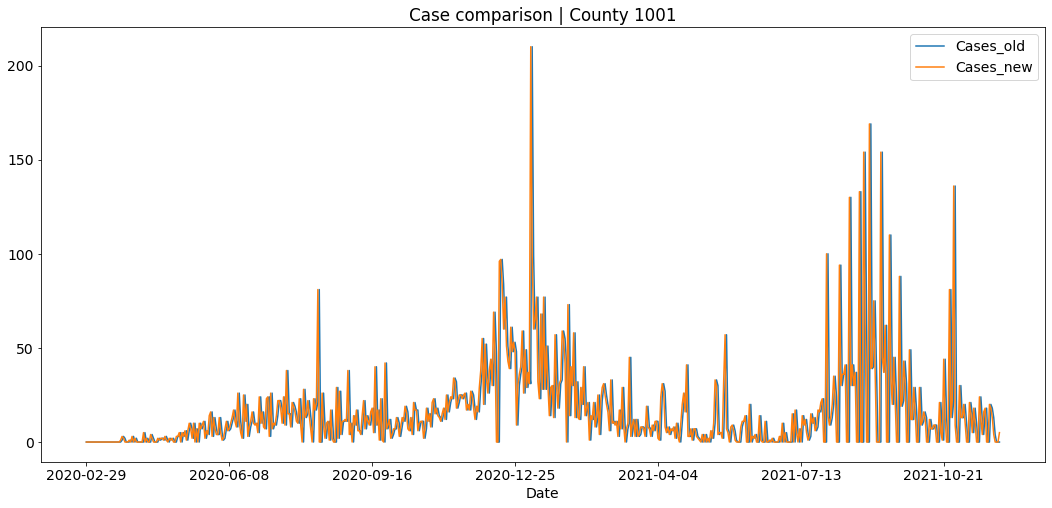

<Figure size 432x288 with 0 Axes>

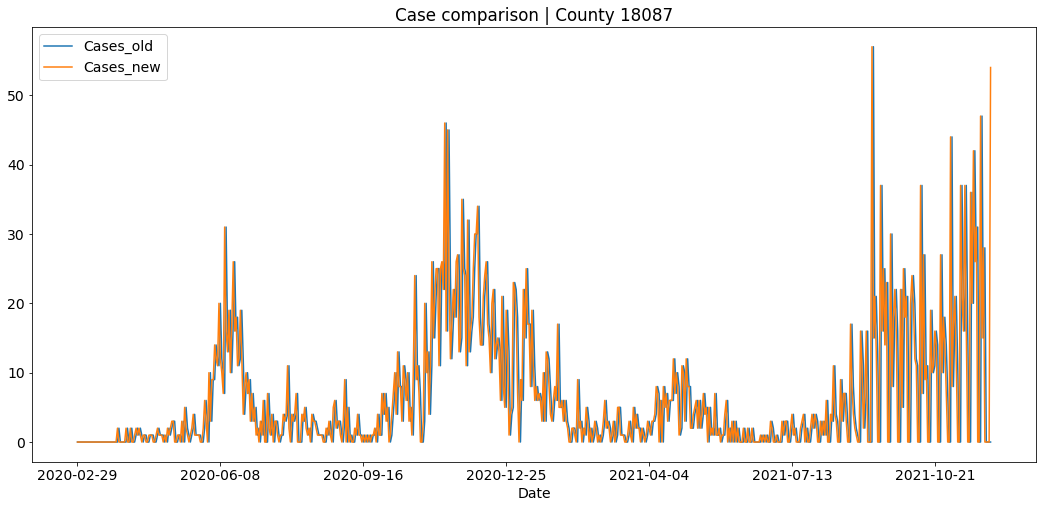

In [56]:
plot_comparison(merged, 'Case comparison', selected_fips=[1001, 18087])

## Vaccination (one dose )

### Old
Percent of people with at least one dose of vaccination.

In [57]:
old_vaccination = pd.read_csv(old_dataset + 'VaccinationOneDose.csv')
print(old_vaccination.shape)
old_vaccination.head()

(3142, 359)


,Unnamed: 0,Name,FIPS,2020-12-13 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00,2020-12-16 00:00:00,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-19 00:00:00,...,2021-11-24 00:00:00,2021-11-25 00:00:00,2021-11-26 00:00:00,2021-11-27 00:00:00,2021-11-28 00:00:00,2021-11-29 00:00:00,2021-11-30 00:00:00,2021-12-01 00:00:00,2021-12-02 00:00:00,2021-12-03 00:00:00
0,0,Abbeville County,45001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.8,40.8,40.8,40.8,40.8,41.0,41.0,41.0,41.1,41.1
1,1,Acadia Parish,22001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.6,54.6,54.6,54.6,54.6,54.7,54.7,54.8,54.9,54.9
2,2,Accomack County,51001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74.3,74.3,74.3,74.3,74.3,74.6,74.6,74.7,74.8,74.9
3,3,Ada County,16001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.5,58.5,58.5,58.5,58.5,58.7,58.7,58.8,58.8,58.9
4,4,Adair County,19001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.7,49.7,49.7,49.7,49.7,49.7,50.0,50.0,50.1,50.1


In [58]:
old_vaccination.drop(columns=['Unnamed: 0', 'Name'], inplace=True)
old_vaccination = old_vaccination.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Dose'
).reset_index(drop=True)
old_vaccination['Date'] = pd.to_datetime(old_vaccination['Date'])

print(old_vaccination.shape)
old_vaccination.head()

(1118552, 3)


,FIPS,Date,Dose
0,45001,2020-12-13,0.0
1,22001,2020-12-13,0.0
2,51001,2020-12-13,0.0
3,16001,2020-12-13,0.0
4,19001,2020-12-13,0.0


### New
Source [CDC vaccination data for county](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh).

In [60]:
new_vaccination = pd.read_csv(new_dataset + 'Vaccination.csv')
new_vaccination['Date'] = pd.to_datetime(new_vaccination['Date'])

new_vaccination.head()

,Date,FIPS,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct
0,2022-04-03,1011,6769.0,67.0,5372.0,53.2
1,2022-04-03,1085,6321.0,65.0,4937.0,50.8
2,2022-04-03,1111,9141.0,40.2,7439.0,32.7
3,2022-04-03,5009,16504.0,44.1,13950.0,37.3
4,2022-04-03,5015,16194.0,57.1,13468.0,47.5


### Merge and compare

In [61]:
merged = old_vaccination.merge(
    new_vaccination[['Date', 'FIPS', 'Administered_Dose1_Pop_Pct']],
    on=['FIPS', 'Date'], how='inner'
)

print(merged.shape)

# Some couties has null values in the cdc dataset. But old data has values in those instances.
mismatch = merged[merged['Dose'] != merged['Administered_Dose1_Pop_Pct']]
print(f'Mismatch statistics')
mismatch.describe()

(1118552, 4)
Mismatch statistics


,FIPS,Dose,Administered_Dose1_Pop_Pct
count,2228.000000,2228.000000,2228.00000
mean,19302.035009,1.327244,30.84807
std,4953.126934,2.051971,20.77543
min,15001.000000,0.000000,0.00000
25%,15005.000000,0.000000,12.40000
50%,15009.000000,0.000000,32.40000
75%,25007.000000,2.125000,45.60000
max,25019.000000,8.500000,99.90000


<Figure size 432x288 with 0 Axes>

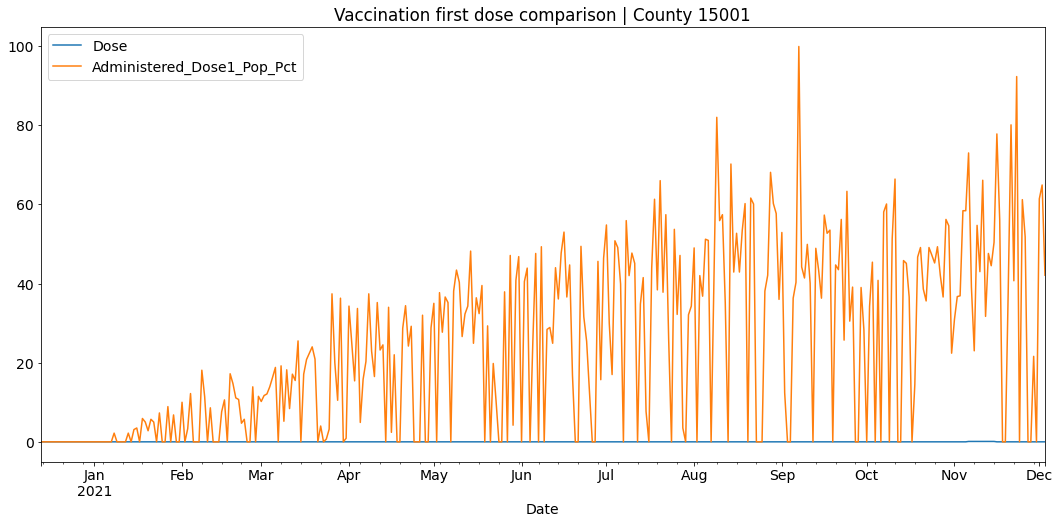

In [63]:
plot_comparison(merged, 'Vaccination first dose comparison', [15001])

## Vaccination (complete dose)

### Old dataset

In [64]:
old_vaccination = pd.read_csv(old_dataset + 'Vaccination.csv')
print(old_vaccination.shape)
old_vaccination.head()

(3142, 359)


,Unnamed: 0,Name,FIPS,2020-12-13 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00,2020-12-16 00:00:00,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-19 00:00:00,...,2021-11-24 00:00:00,2021-11-25 00:00:00,2021-11-26 00:00:00,2021-11-27 00:00:00,2021-11-28 00:00:00,2021-11-29 00:00:00,2021-11-30 00:00:00,2021-12-01 00:00:00,2021-12-02 00:00:00,2021-12-03 00:00:00
0,0,Abbeville County,45001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.9,36.9,36.9,36.9,36.9,36.9,36.9,37.0,37.1,37.1
1,1,Acadia Parish,22001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,49.0,49.0,49.0,49.0,49.1,49.1,49.2,49.2,49.2
2,2,Accomack County,51001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.1,66.1,66.1,66.1,66.1,66.3,66.3,66.3,66.5,66.6
3,3,Ada County,16001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.4,53.4,53.4,53.4,53.4,53.5,53.5,53.6,53.6,53.6
4,4,Adair County,19001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.6,45.6,45.6,45.6,45.6,45.6,45.8,45.8,45.9,46.0


In [65]:
old_vaccination.drop(columns=['Unnamed: 0', 'Name'], inplace=True)
old_vaccination = old_vaccination.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Dose'
).reset_index(drop=True)
old_vaccination['Date'] = pd.to_datetime(old_vaccination['Date'])

print(old_vaccination.shape)

(1118552, 3)


### New dataset
Already loaded in previous section.

#### Merge and compare

In [66]:
merged = old_vaccination.merge(
    new_vaccination[['Date', 'FIPS', 'Series_Complete_Pop_Pct']],
    on=['FIPS', 'Date'], how='inner'
)

# Some couties has null values in the cdc dataset. But old data has values in those instances.
mismatch = merged[merged['Dose'] != merged['Series_Complete_Pop_Pct']]
print(f'Mismatch statistics')
mismatch.describe()

Mismatch statistics


,FIPS,Dose,Series_Complete_Pop_Pct
count,2285.000000,2285.000000,2285.000000
mean,19164.200875,0.951947,26.916149
std,4931.533548,1.567431,18.826344
min,15001.000000,0.000000,0.000000
25%,15005.000000,0.000000,9.200000
50%,15009.000000,0.000000,28.300000
75%,25007.000000,1.300000,40.300000
max,25019.000000,5.600000,99.900000


<Figure size 432x288 with 0 Axes>

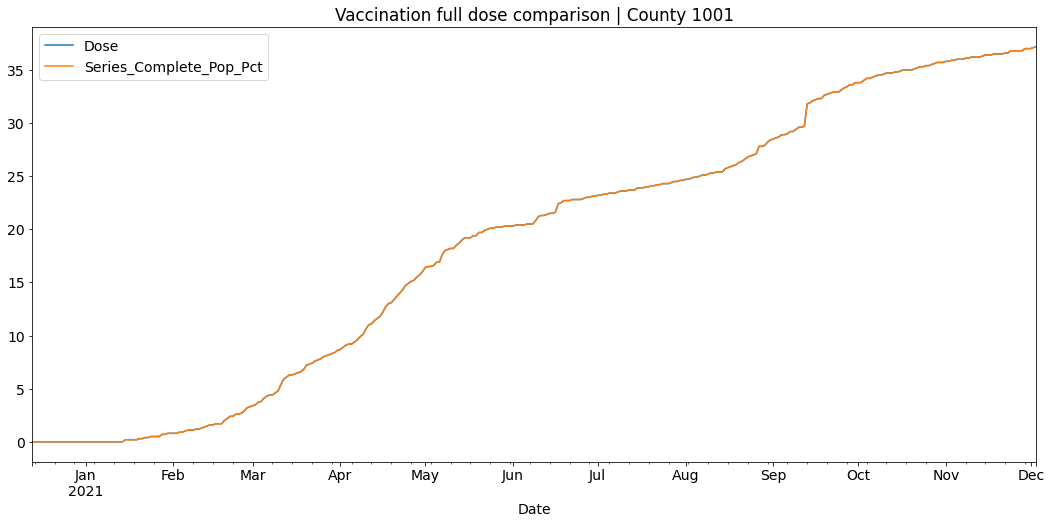

<Figure size 432x288 with 0 Axes>

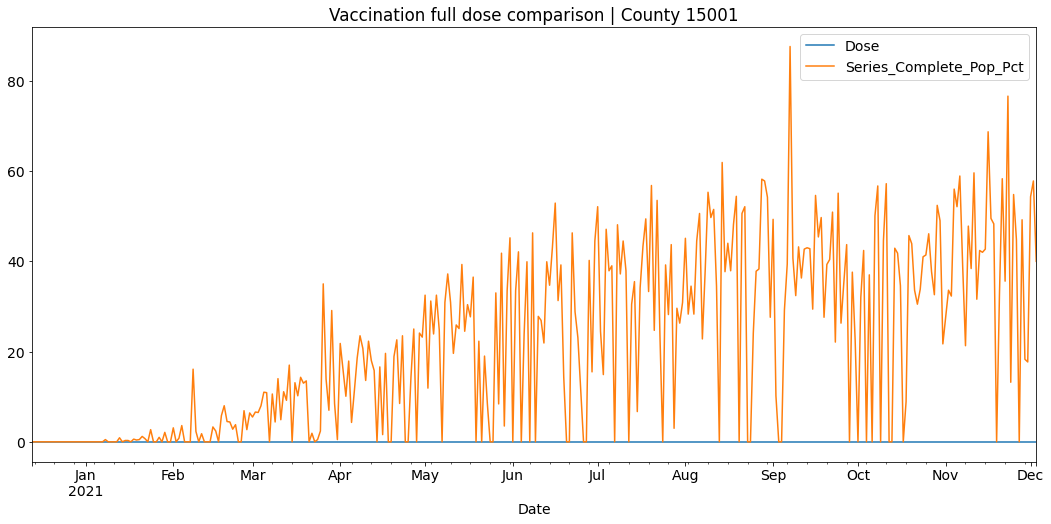

In [67]:
plot_comparison(merged, 'Vaccination full dose comparison', selected_fips=[1001, 15001])

## Testing

### Old
This is state level testing data copying into all counties. Not county level data.

In [113]:
old_testing = pd.read_csv(old_dataset+'Testing.csv')
old_testing.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
1,"Alabama, Baldwin",1003,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
2,"Alabama, Barbour",1005,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
3,"Alabama, Bibb",1007,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
4,"Alabama, Blount",1009,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971


### New dataset
Number of people who were tested on that day in that county. Though it is weird that it is a fractional value. Source “County - Testing Counts - CDC” file from [US Covid Atlas (theuscovidatlas.org)](https://theuscovidatlas.org/download).

In [162]:
new_testing = pd.read_csv(new_dataset+'Testing.csv')
new_testing.head()

,FIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.3,60.9,73.9,72.3,70.6,80.1,71.0,71.1,69.4,64.1
1,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178.9,174.6,168.1,168.9,163.4,155.1,152.6,149.9,153.3,161.1
2,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.9,16.0,17.0,17.4,17.0,14.6,14.0,14.7,14.7,14.3
3,1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.7,23.3,24.3,25.3,24.1,22.0,20.1,18.0,17.7,16.6
4,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.9,43.7,43.3,39.9,36.9,33.6,30.6,29.3,32.0,32.0


## Spread

### Old

In [68]:
old_spread = pd.read_csv(old_dataset+'Disease Spread.csv')
old_spread.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051575,0.051575,0.051575,0.047305,0.048784,0.046225,0.041590,0.041590,0.041590,0.041590
1,"Alabama, Baldwin",1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040835,0.040835,0.040835,0.039256,0.040424,0.041415,0.037720,0.037720,0.037720,0.037720
2,"Alabama, Barbour",1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034244,0.034244,0.034244,0.042569,0.045127,0.045521,0.043946,0.043946,0.043946,0.043946
3,"Alabama, Bibb",1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029638,0.029638,0.029638,0.027553,0.031777,0.031256,0.028236,0.028236,0.028236,0.028236
4,"Alabama, Blount",1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046665,0.046665,0.046665,0.040140,0.040699,0.041655,0.032773,0.032773,0.032773,0.032773


In [69]:
old_spread = old_spread.drop(columns='Name').melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Spread'
).reset_index(drop=True)

old_spread['Date'] = pd.to_datetime(old_spread['Date'])
old_spread.fillna(0, inplace=True)

### New

In [70]:
new_spread = pd.read_csv('cleaned/Disease Spread.csv')
new_spread.head()

,FIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002945,0.004919,0.004917,0.004917,0.004917,0.006565,0.006309,0.008140,0.008576,0.008448
1,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003429,0.003537,0.001678,0.001678,0.001678,0.001407,0.001695,0.001767,0.001857,0.002091
2,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033946,0.033769,0.033416,0.033416,0.033416,0.032709,0.032001,0.032173,0.031813,0.031813
3,1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001714,0.001558,0.000935,0.000935,0.000935,0.001246,0.001246,0.001090,0.000934,0.001090
4,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001208,0.001141,0.000805,0.000805,0.000805,0.000738,0.000738,0.001006,0.002144,0.002210


In [71]:
new_spread = new_spread.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Spread'
).reset_index(drop=True)

new_spread['Date'] = pd.to_datetime(new_spread['Date'])
new_spread.fillna(0, inplace=True)

### Merge and compare

In [72]:
merged = old_spread.merge(new_spread,on=['FIPS', 'Date'], how='inner', suffixes=('_old', '_new'))

# Some couties has null values in the cdc dataset. But old data has values in those instances.
mismatch = merged[merged['Spread_old'] != merged['Spread_new']]
print(f'Mismatch statistics')
mismatch.describe()

Mismatch statistics


,FIPS,Spread_old,Spread_new
count,1.724550e+06,1.724550e+06,1.724550e+06
mean,3.024864e+04,1.589371e-01,1.316338e-01
std,1.522910e+04,1.730378e-01,1.720130e-01
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.813300e+04,3.614458e-02,2.072000e-02
50%,2.910700e+04,1.026316e-01,6.407300e-02
75%,4.506100e+04,2.203390e-01,1.724140e-01
max,5.604500e+04,1.000000e+00,1.000000e+00


<Figure size 432x288 with 0 Axes>

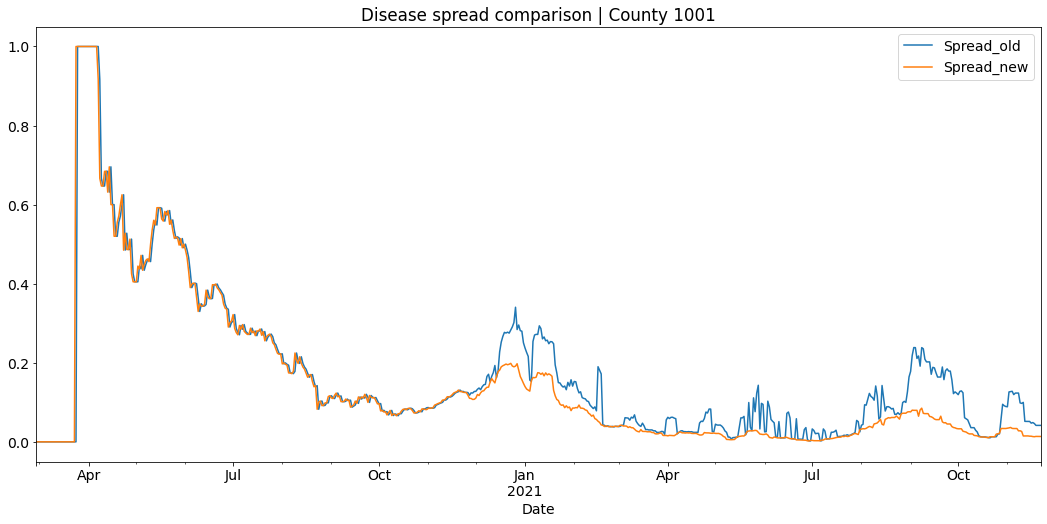

<Figure size 432x288 with 0 Axes>

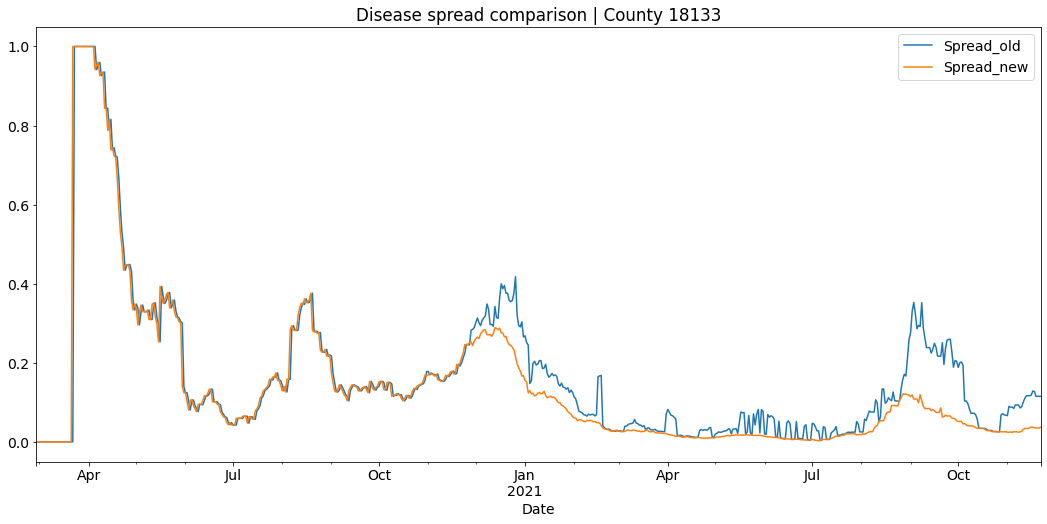

In [73]:
plot_comparison(merged, 'Disease spread comparison', [1001, 18133])